# LSST Deep Drill Fields


`	

ELAIS S1	XMM-LSS	Extended Chandra Deep Field-South	COSMOS

RA 2000	00 37 48	02 22 50	03 32 30	10 00 24

DEC 2000	-44 00 00	-04 45 00	-28 06 00	+02 10 55``


```

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from astropy.coordinates import SkyCoord
import os
from astropy import units as u
from astropy.table import Table

homedir = os.getenv("HOME")

In [5]:
ddrilldir = homedir+'/research/protoclusters/deepdrill/'

In [9]:
os.listdir(ddrilldir)

['deepdrill_es1_05sep18_merged_3s_cat_v2.tbl',
 'deepdrill_cdfs_28may17_merged_3s_cat_v2.tbl',
 'Unconfirmed 61407.crdownload']

In [11]:
lsst_index = {'XMM':0,'COSMOS':1,'ECDFS':2}
lsst_ra_list = ['00 37 48', '02 22 50', '03 32 30', '10 00 24']
lsst_dec_list = ['-44 00 00', '-04 45 00', '-28 06 00', '+02 10 55']


lsst_radius = 3.5/2 # degrees


In [16]:

lsst_coord =SkyCoord(ra=lsst_ra_list,dec=lsst_dec_list,unit=(u.hr,u.deg))

In [17]:
lsst_coord

<SkyCoord (ICRS): (ra, dec) in deg
    [(  9.45      , -44.        ), ( 35.70833333,  -4.75      ),
     ( 53.125     , -28.1       ), (150.1       ,   2.18194444)]>

# Night Sky Spectrum

In [18]:
oh = homedir+'/research/protoclusters/nearIRsky/mk_skybg_nq_16_10_ph.dat.txt'

In [21]:
ohdat= Table.read(oh,format='ascii')

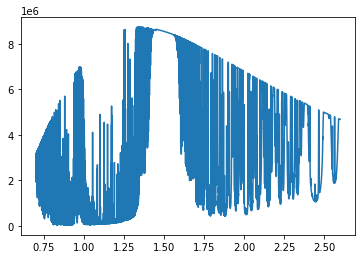

In [25]:
plt.figure()
plt.plot(ohdat['col1']/1.e4,ohdat['col2'])

# Position of clusters relative to Night Sky Lines

In [232]:
def read_swims_filters(scale=1):
    import glob
    from astropy.table import Table
    # get contents of directory
    filelist = glob.glob('*.txt')
    # loop through and plot each filter
    for f in filelist:
        if 'nb' in f:
            if 'dummy' in f:
                continue
            else:
                fdat = Table.read(f,format='ascii')
                # convert wavelength from nm to micron
                plt.plot(fdat['col1']/1.e3,scale*fdat['col2']/np.max(fdat['col2']),label=f)
    
    pass

In [233]:
def read_table(fname):
    input = open(fname,'r')
    x=[]
    y=[]
    for line in input:
        if line.startswith('#'):
            continue
        t = line.split()
        if len(t) > 0:
            x.append(t[0])
            y.append(t[1])
    return np.array(x,'d'),np.array(y,'d')
def read_moircs_filters(scale=1):
    import glob
    from astropy.table import Table
    # get contents of directory
    filelist = glob.glob('*.txt')
    # loop through and plot each filter
    for f in filelist:
        #print(f)
        
        #fdat = Table.read(f,format='ascii')
        x,y = read_table(f)
        if (f.find('Kcont_jis') > -1) | (f.find('H2jis') > -1):
            # convert wavelength from AA to micron
            x = x/1.e4
        else:
            # convert wavelength from nm to micron
            x = x/1.e3
            
        # convert wavelength from nm to micron
        plt.plot(x,scale*y/np.max(y),label=f)
        
    pass

def read_hsc_filters(scale=1):
    import glob
    from astropy.table import Table
    # get contents of directory
    filelist = glob.glob('*.txt')
    # loop through and plot each filter
    for f in filelist:
        x,y = read_table(f)
        # wavelength from AA to micron   
        plt.plot(x,scale*y/np.max(y),label=f)
        
    pass

In [230]:
#sample_file = homedir+'/research/protoclusters/sample/protoclusters - emission line wave.csv'

sample_file = homedir+'/research/protoclusters/sample/protoclusters.csv'

In [231]:
pcdat = Table.read(sample_file,format='csv')[1:]

In [239]:
def plot_filters(halpha,o3,o2,title=None,swims=False,moircs=False,hsc=False,redshift=None,lya=None):
    plt.figure(figsize=(12,4))
    var = halpha
    #mybins = np.linspace(min(var),max(var),200)
    mybins = np.linspace(1,2.5,200)
    t = plt.hist(var,bins=mybins,color='r',label='Halpha')

    var = o3
    #mybins = np.linspace(min(var),max(var),200)
    t = plt.hist(var,bins=mybins,color='g',label='OIII')
 
    var = o2
    #mybins = np.linspace(min(var),max(var),200)
    t = plt.hist(var,bins=mybins,color='b',label='OII')
  
 
             
    #plt.title("H-alpha",fontsize=16)
    plt.xlabel(r'$\rm Wavelength \ (\mu m)$',fontsize=18)
    plt.ylabel(r'$\rm Number$',fontsize=18)

    # night sky

    #plt.plot(ohdat['col1']/1.e4,ohdat['col2']/3.e6,alpha=.2)
    
    ymin,ymax=plt.ylim()
    if moircs:
        instrument='MOIRCS'
        xmin,xmax = 1.1,2.4
    if swims:
        instrument='SWIMS'
        xmin,xmax = 1.1,2.4
    if lya is not None:
        print('plotting Ly alpha ',lya)
        xmin,xmax = 3000,11000
        var = lya
        mybins = np.linspace(xmin,xmax,200)
        plt.hist(var,color='darkviolet',label='Ly-a')
    plt.xlim(xmin,xmax)
    
    
    if swims:
        os.chdir(homedir+'/research/protoclusters/nbfilters/swims-filter-data/')
        read_swims_filters(scale=ymax)
    if moircs:
        os.chdir(homedir+'/research/protoclusters/nbfilters/moircs/')
        read_moircs_filters(scale=ymax)
    if hsc:
        os.chdir(homedir+'/research/protoclusters/nbfilters/hsc/')
        read_hsc_filters(scale=ymax)
        plt.xlabel('Wavelength (A)')
        instrument='HSC'
    if hsc:
        plt.legend(bbox_to_anchor =(1.1, 1),ncol=2)
        
    else:
        plt.legend(bbox_to_anchor =(1.1, 1),ncol=2)
    if title is not None:
        if redshift is not None:
            plt.title("{}: {}, z={:.3f}".format(instrument,title,redshift))
        else:
            plt.title("{}: {}".format(instrument,title))
    
    
#plt.xlim(2.1,2.2)

<ipython-input-234-b65b7131e794>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,4))


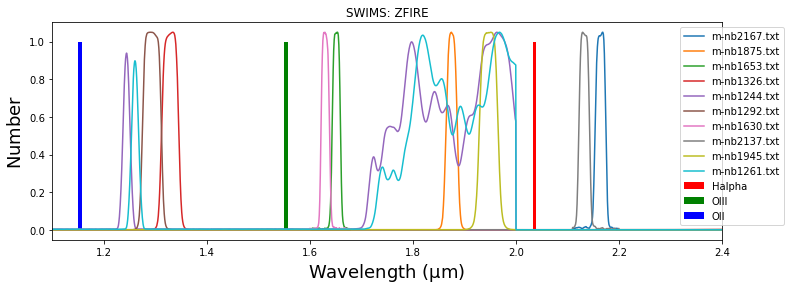

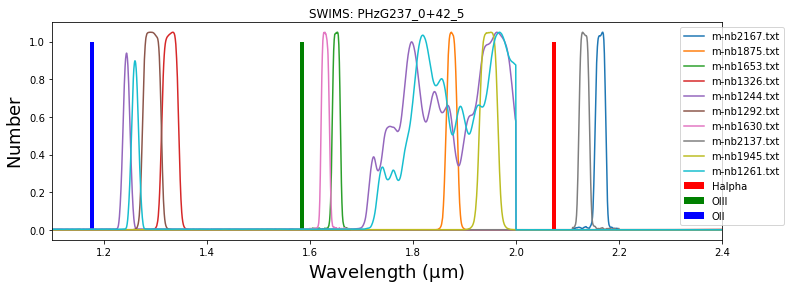

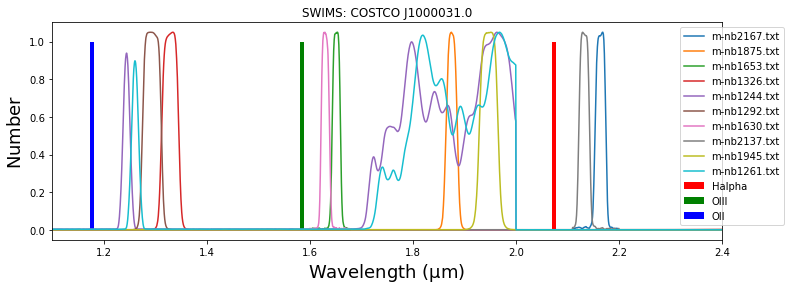

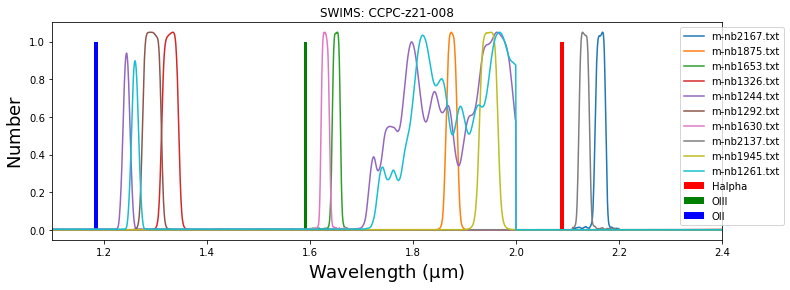

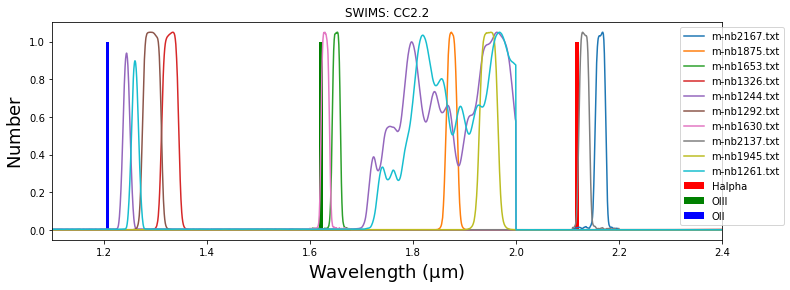

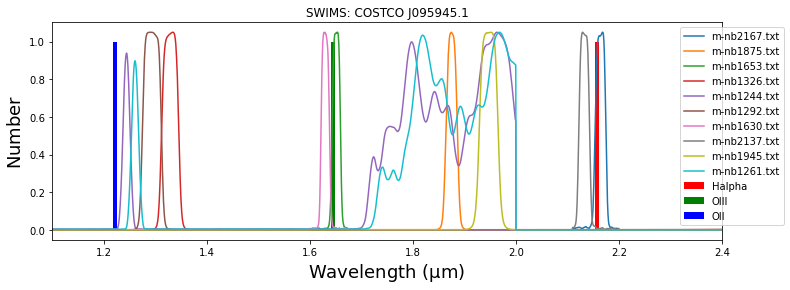

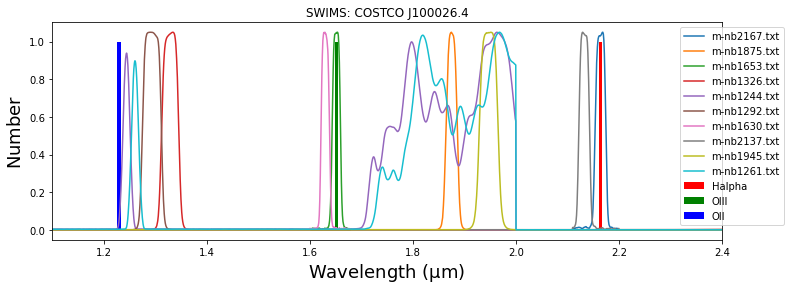

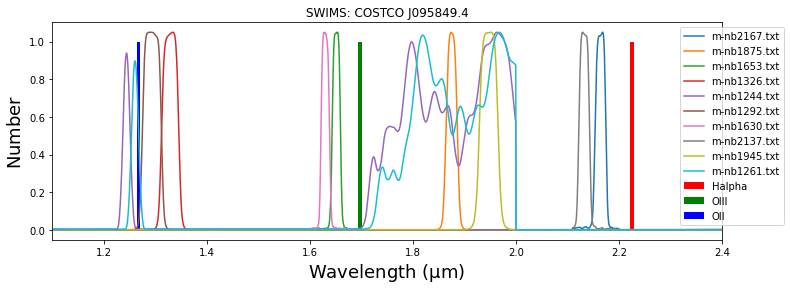

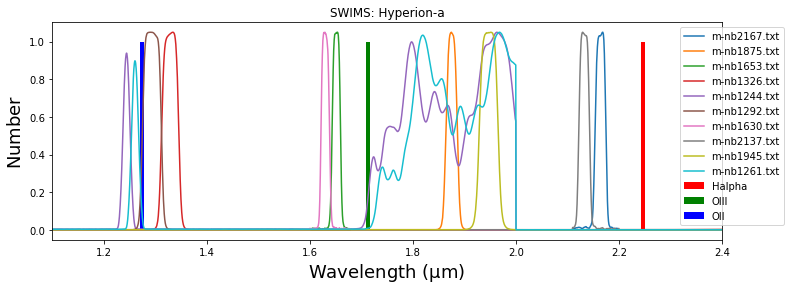

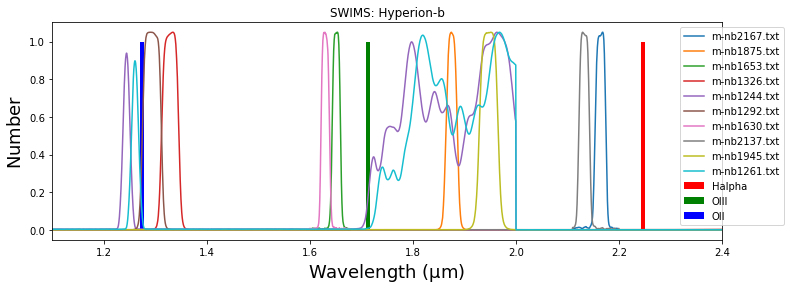

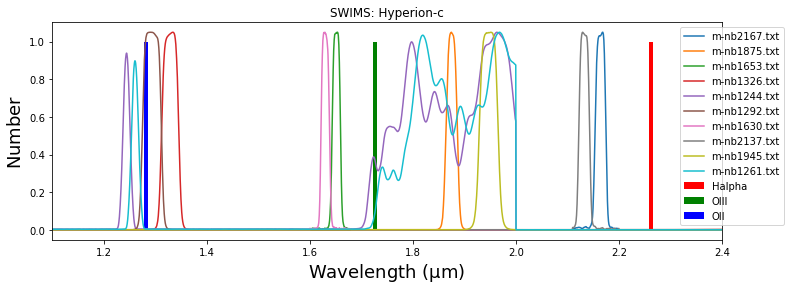

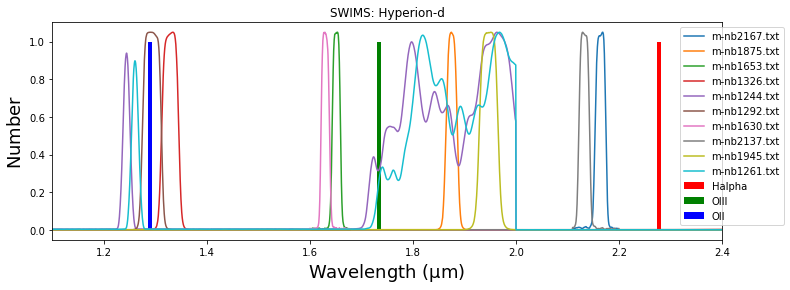

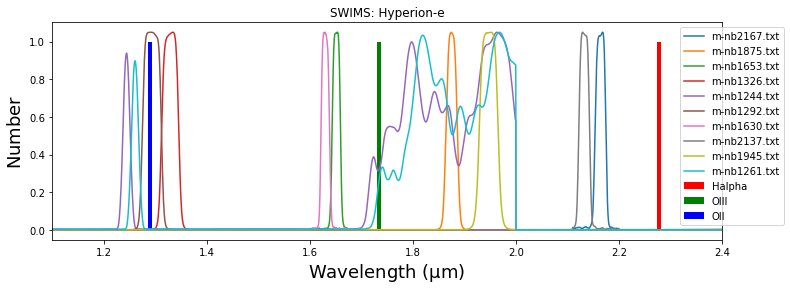

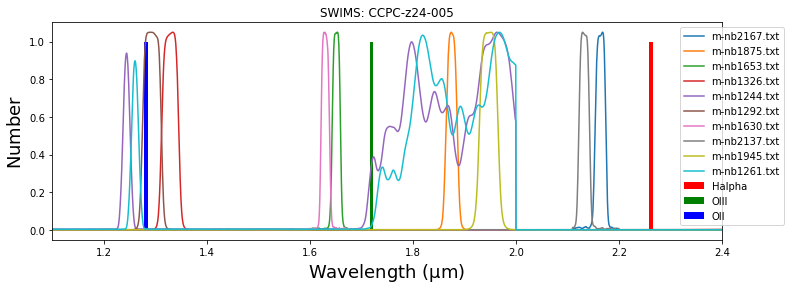

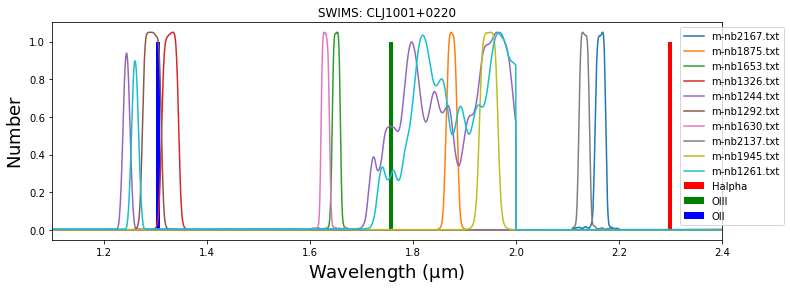

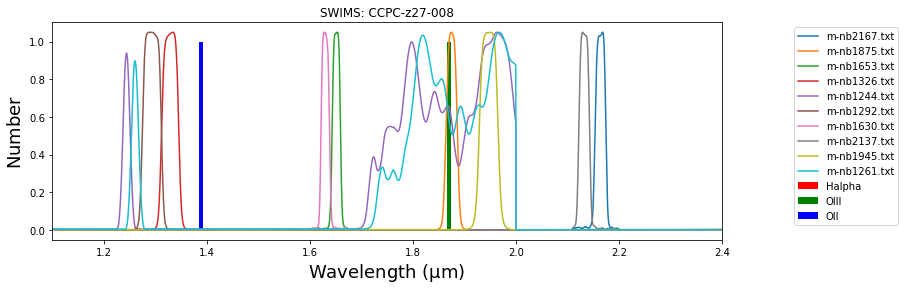

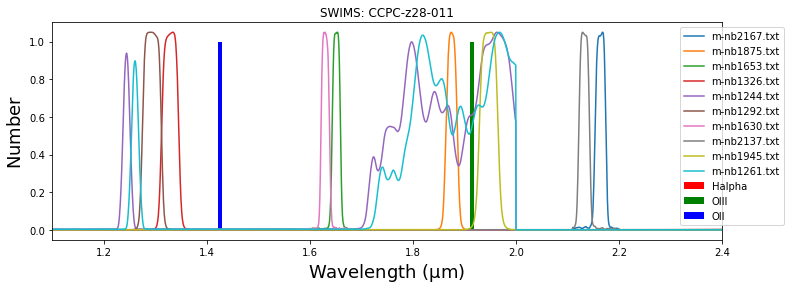

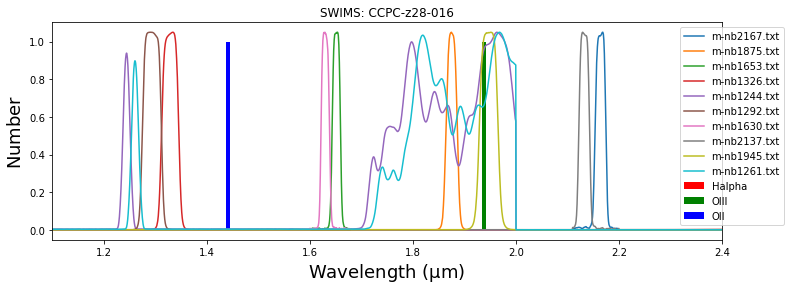

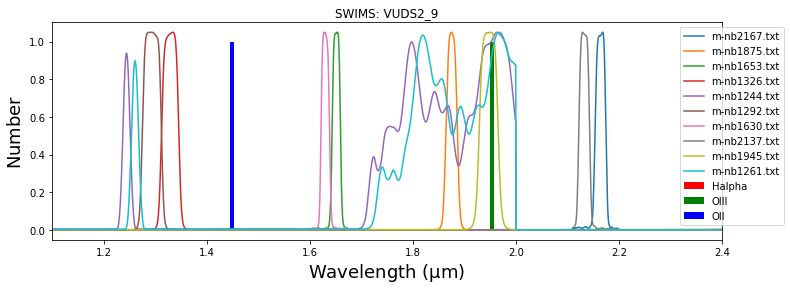

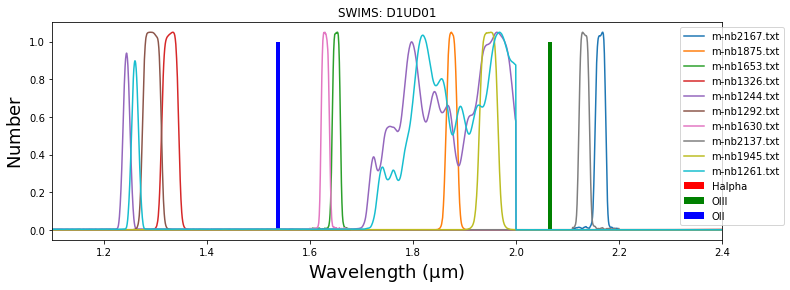

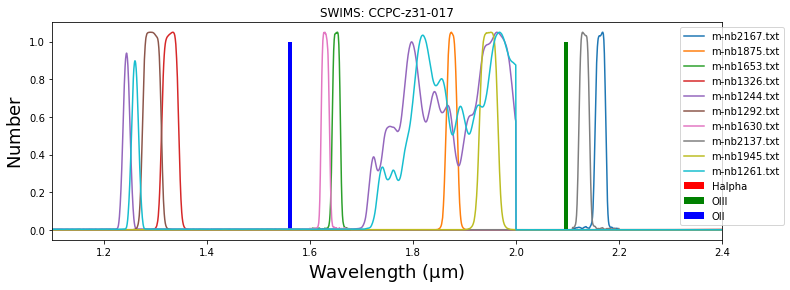

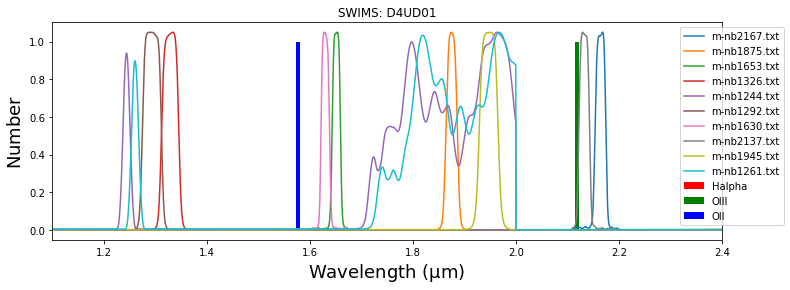

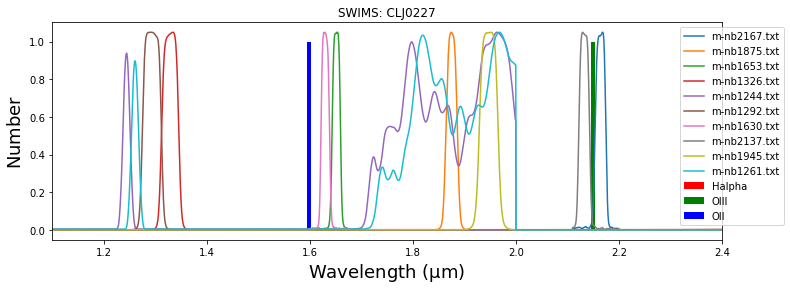

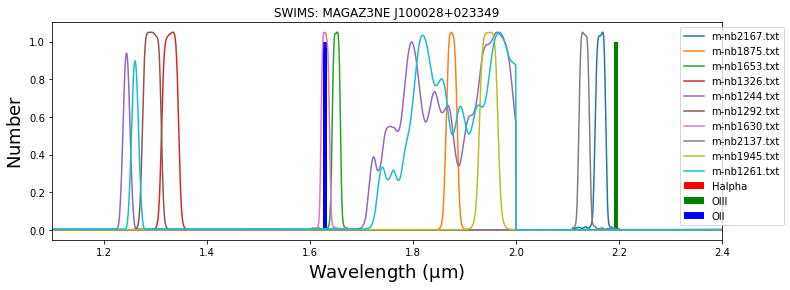

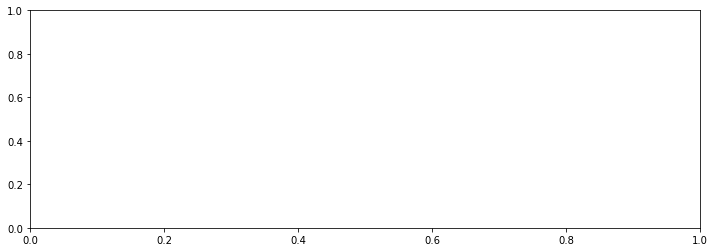

In [237]:
for i,c in enumerate(pcdat):
    ha = pcdat['H-alpha (microns)'][i]
    o3 = pcdat['OIII'][i]
    o2 = pcdat['OII'][i]
    mytitle = pcdat['name'][i]
    try:
        if len(mytitle) > 2:
            plot_filters(ha,o3,o2,title=mytitle,swims=True)
    except TypeError:
        continue

<ipython-input-239-c852b018e768>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,4))


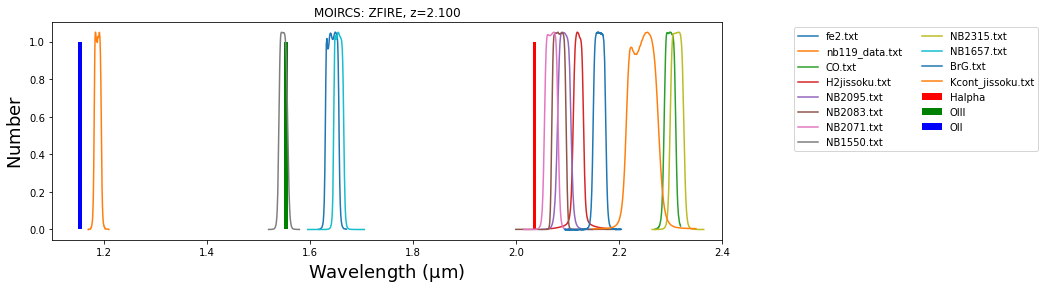

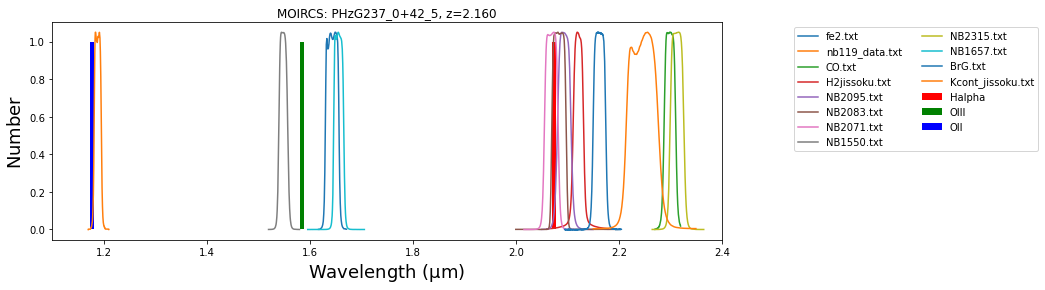

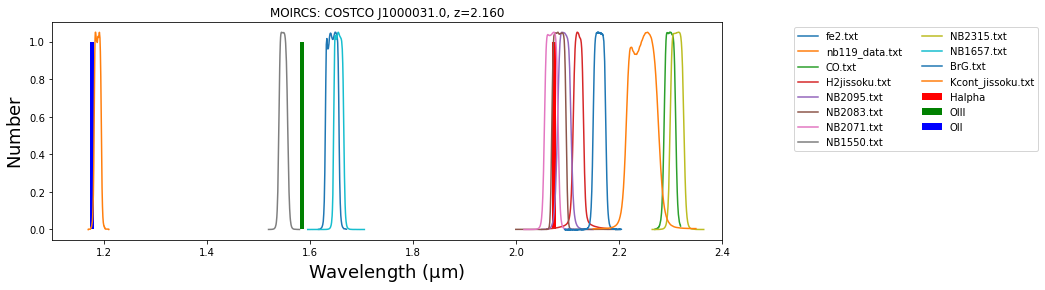

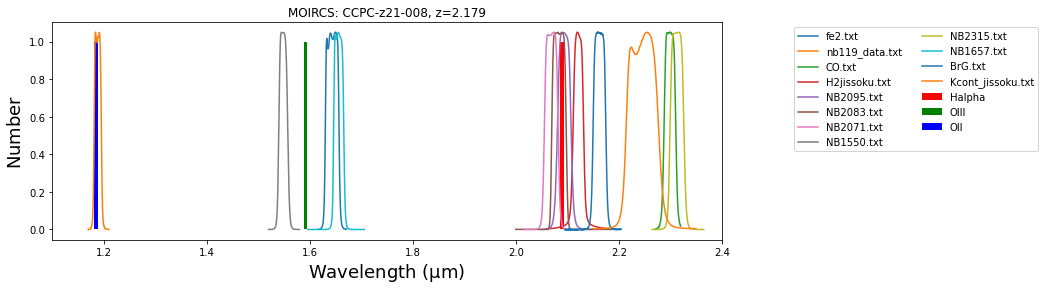

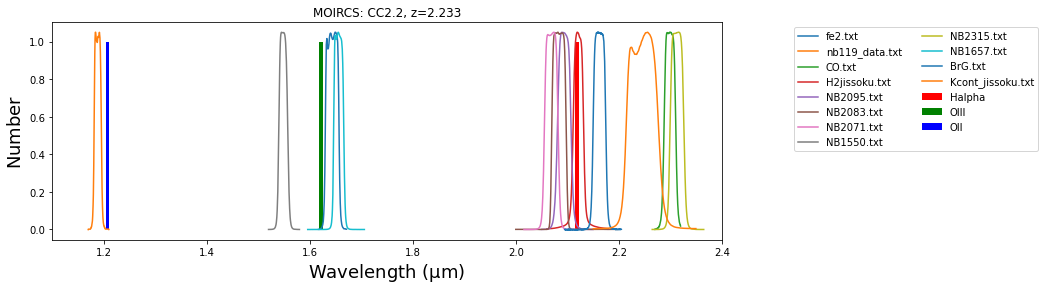

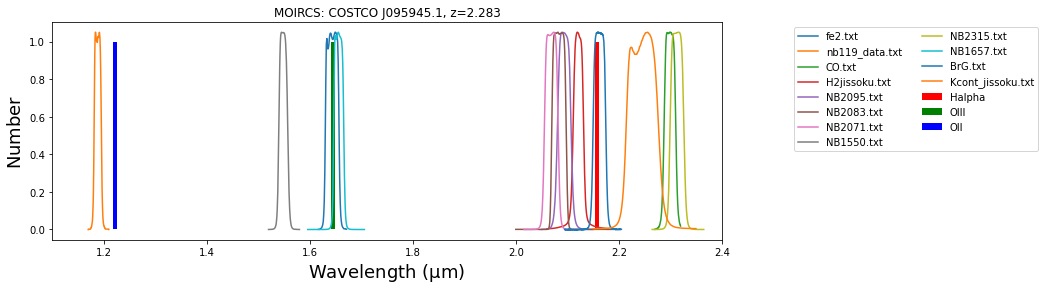

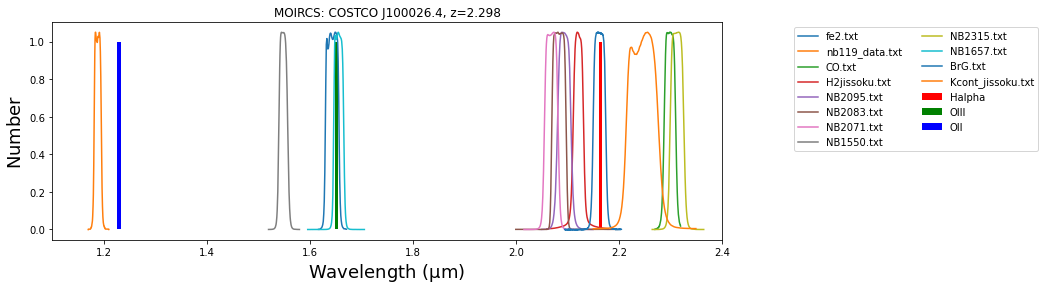

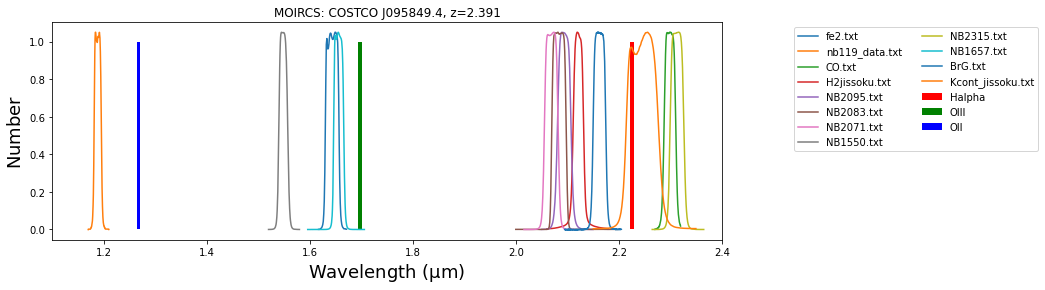

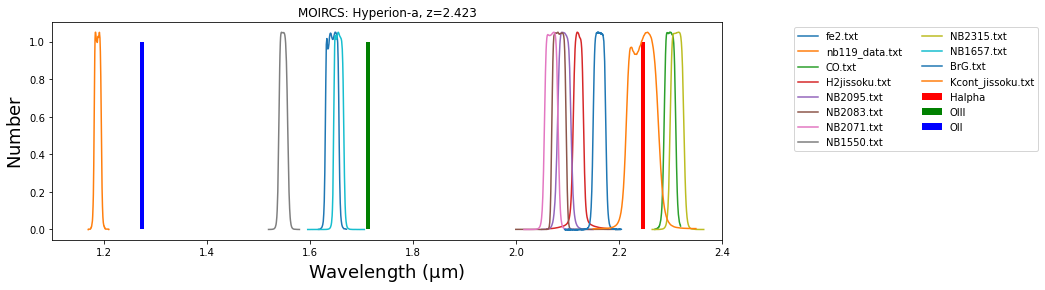

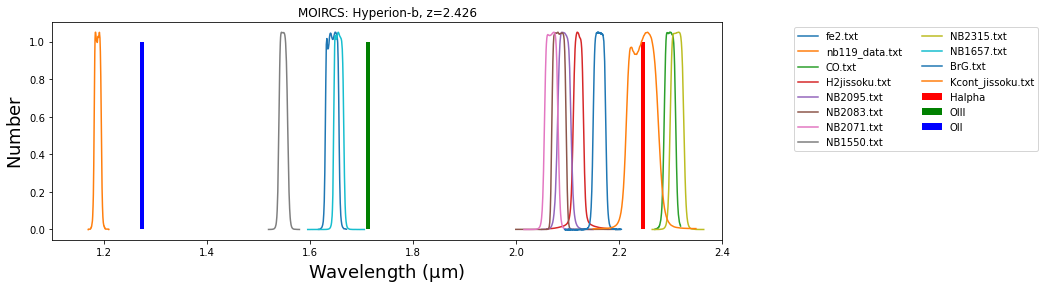

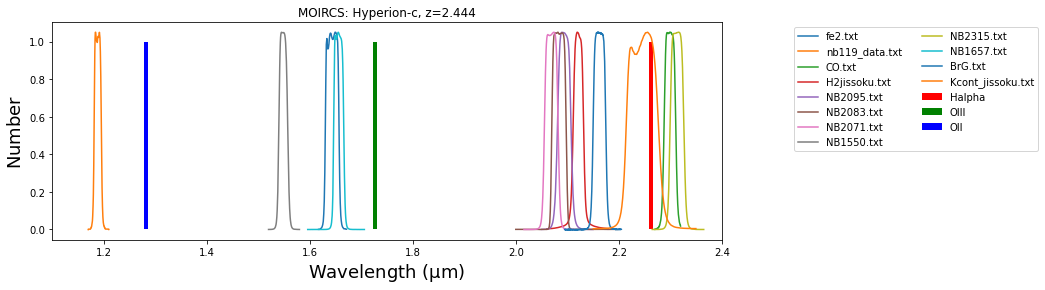

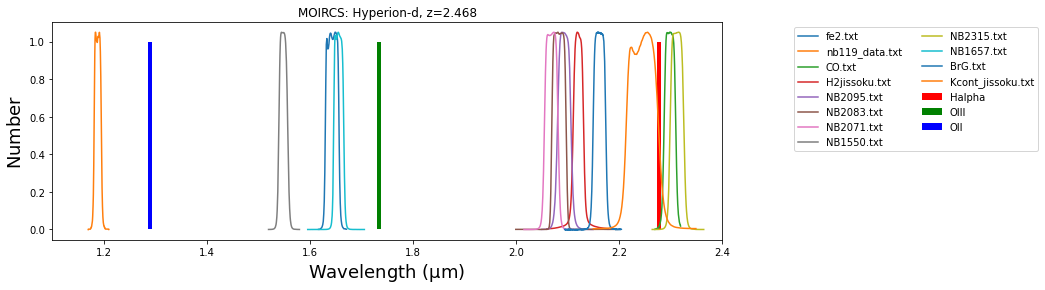

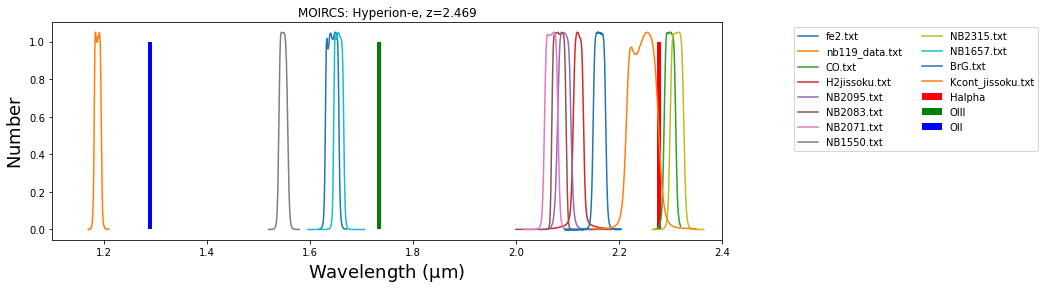

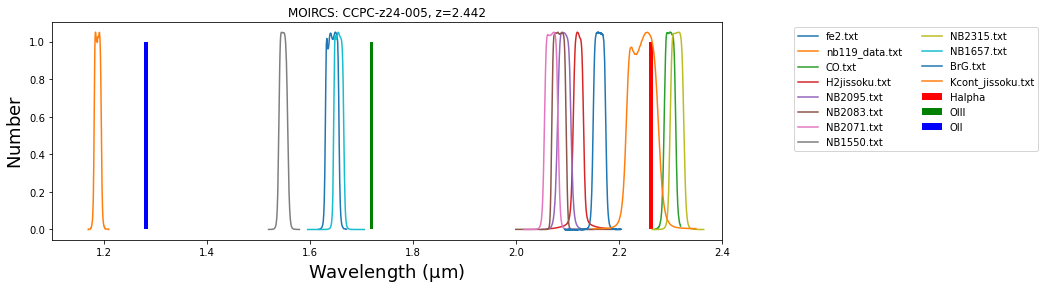

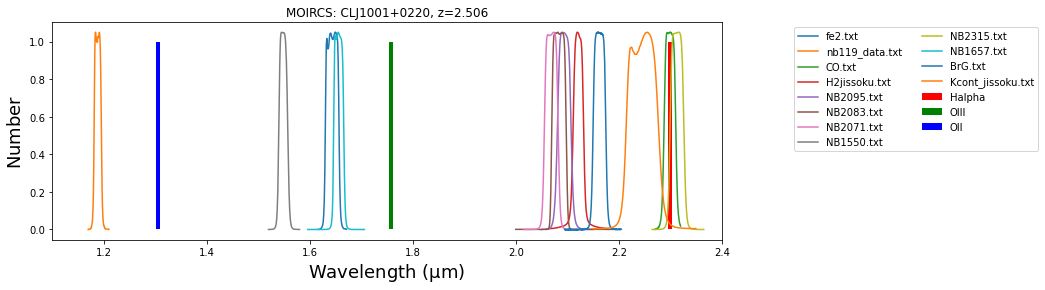

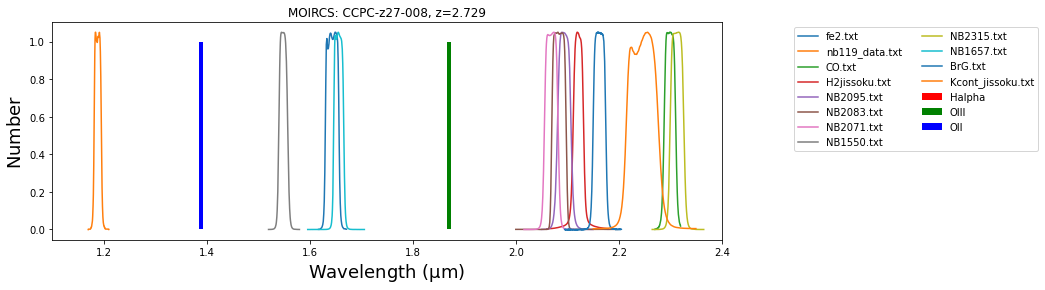

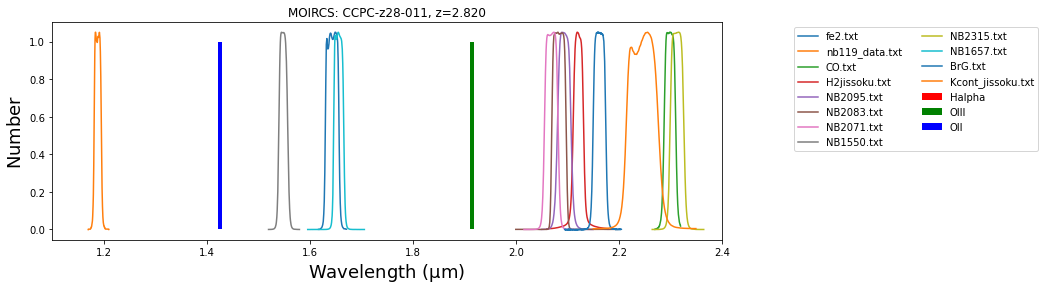

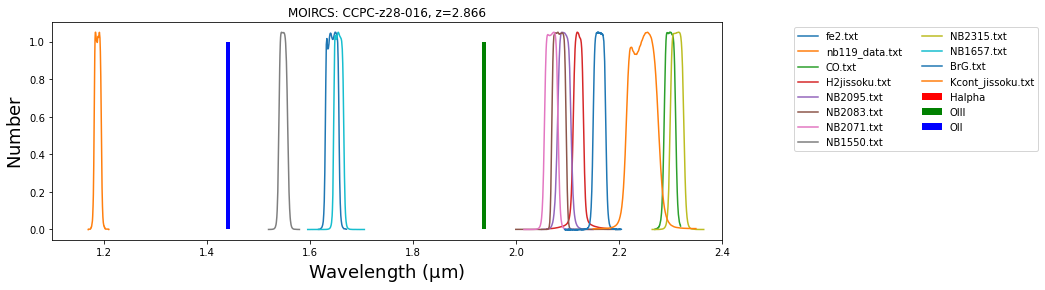

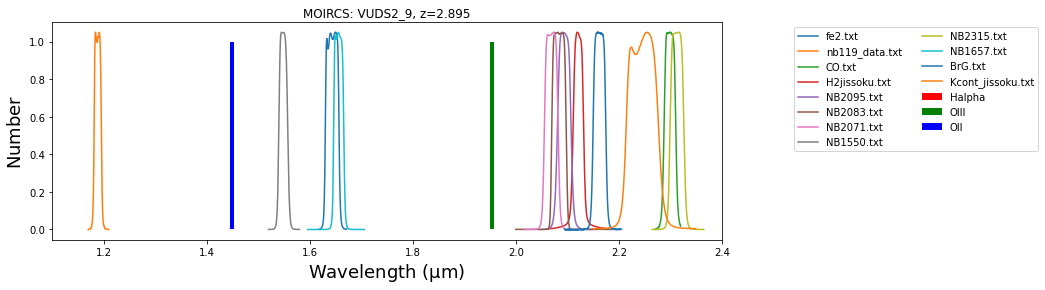

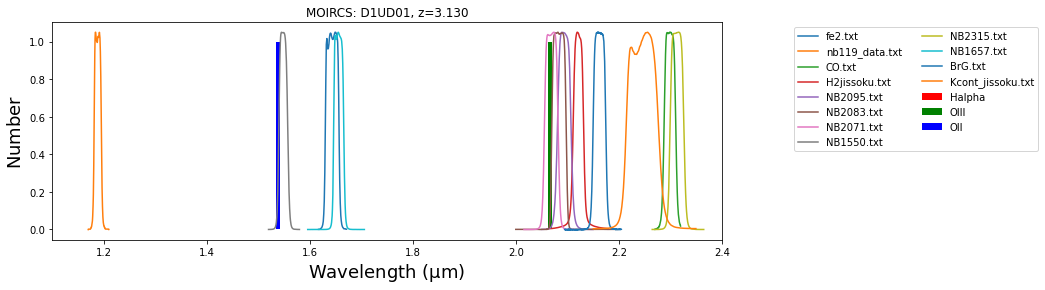

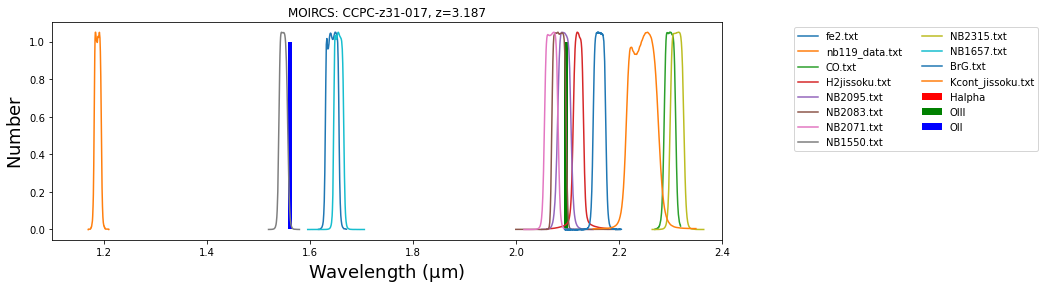

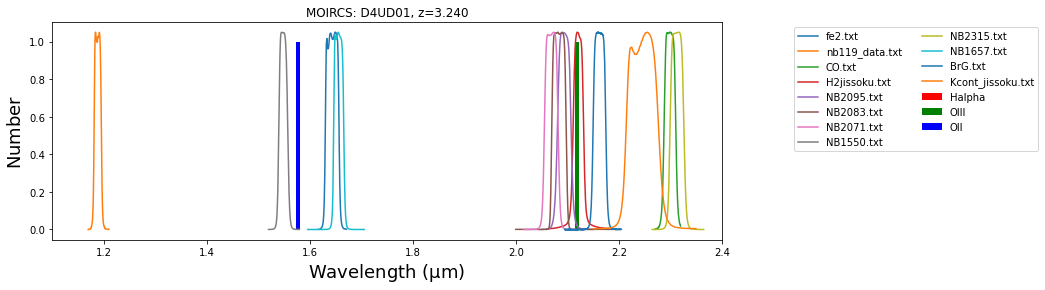

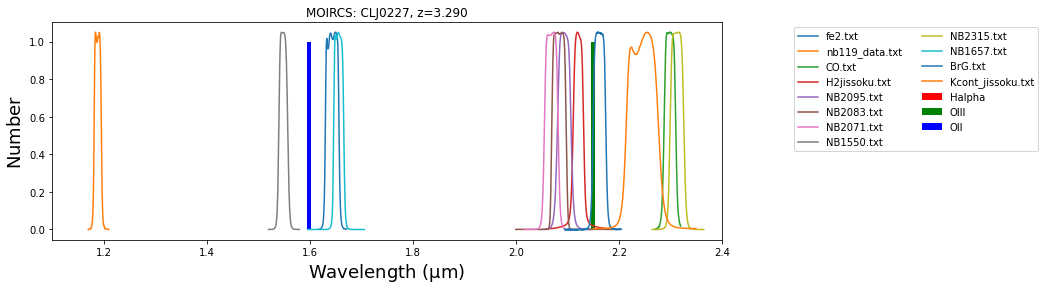

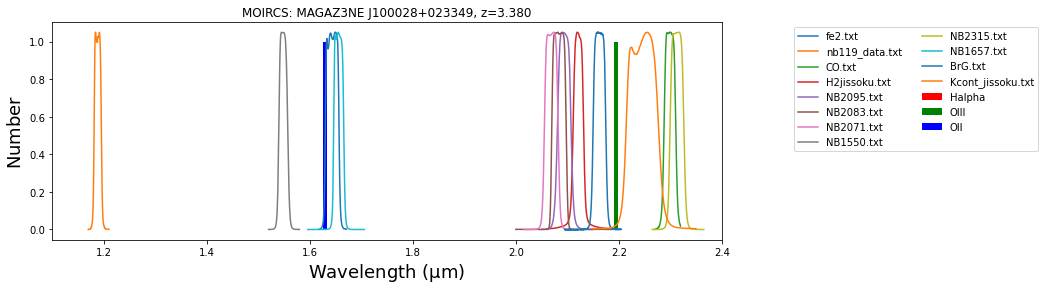

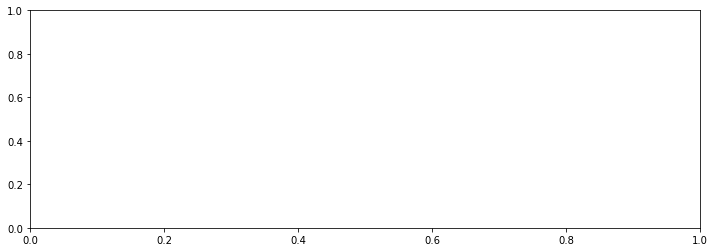

In [240]:
for i,c in enumerate(pcdat):
    ha = pcdat['H-alpha (microns)'][i]
    o3 = pcdat['OIII'][i]
    o2 = pcdat['OII'][i]
    mytitle = pcdat['name'][i]
    redshift = pcdat['z'][i]
    try:
        if len(mytitle) > 2:
            plot_filters(ha,o3,o2,title=mytitle,moircs=True,redshift=redshift)
    except TypeError:
        continue

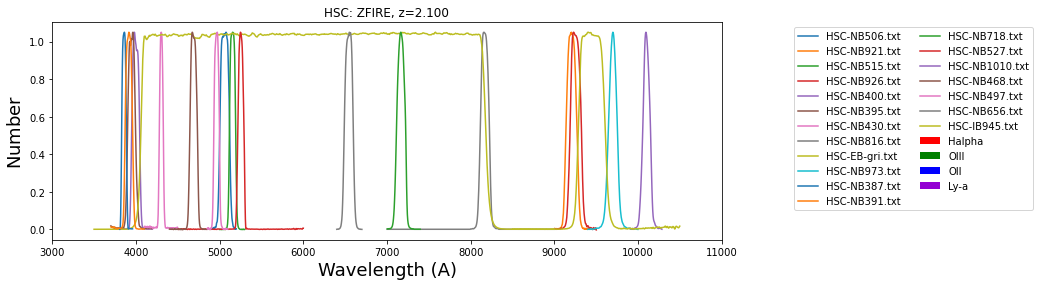

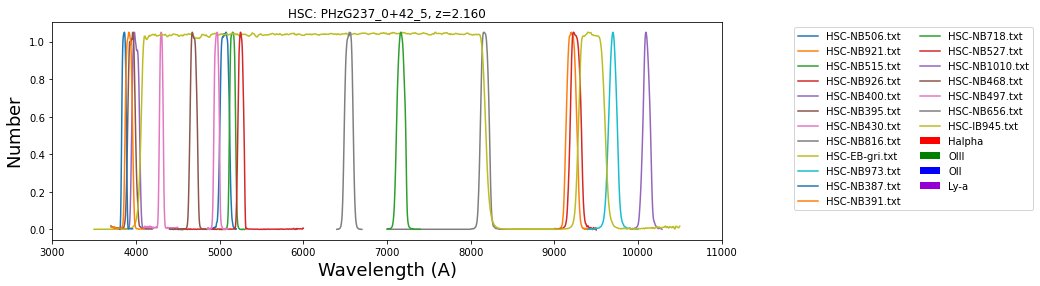

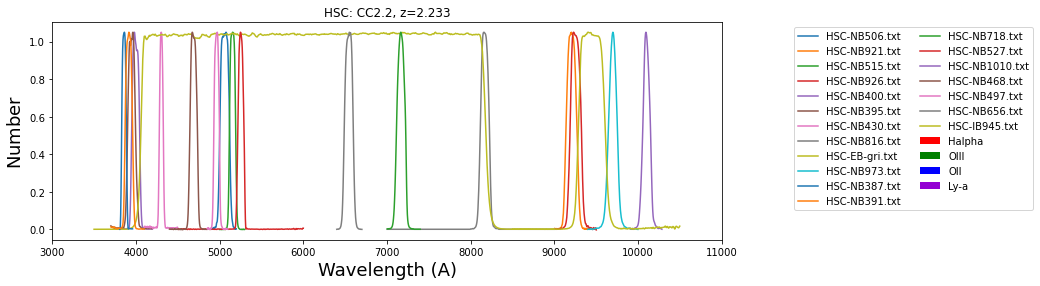

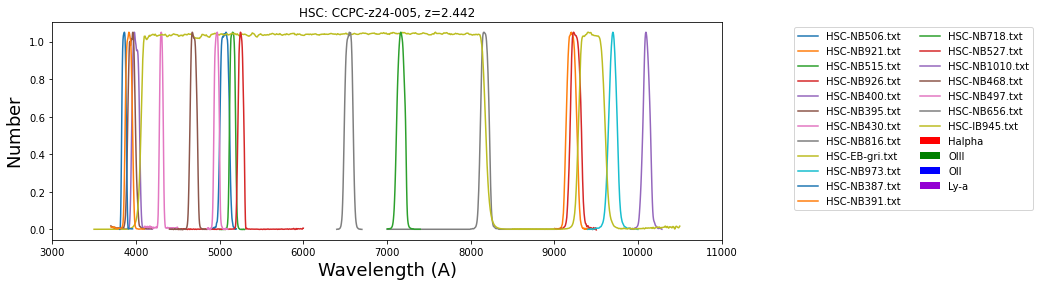

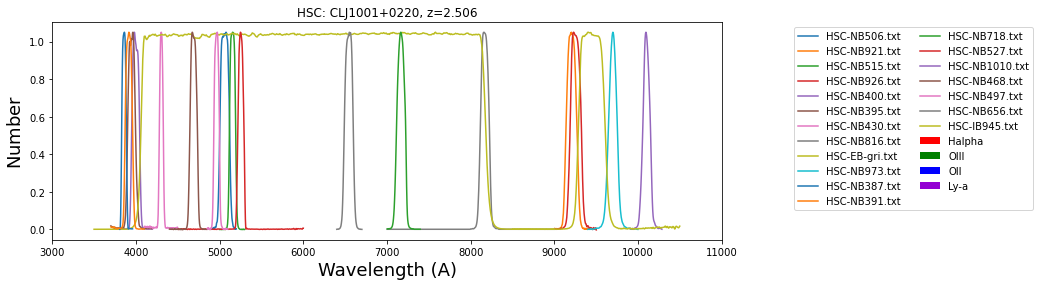

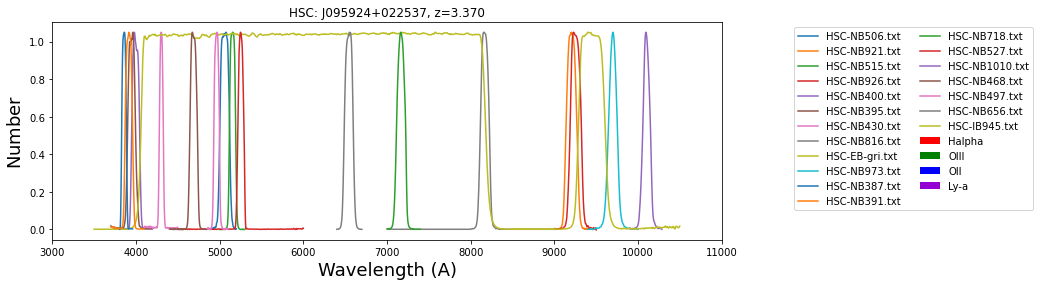

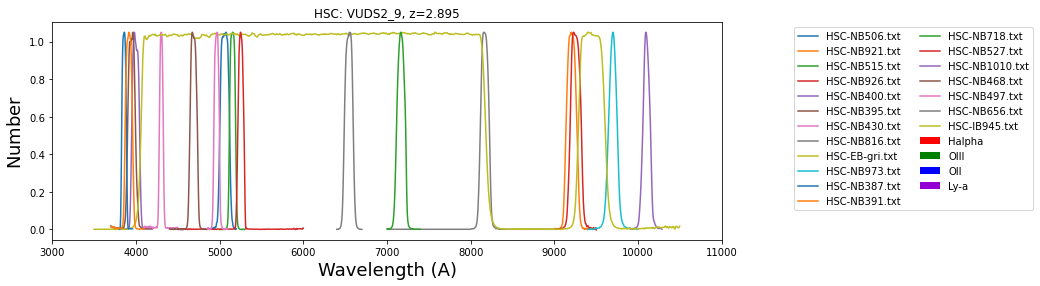

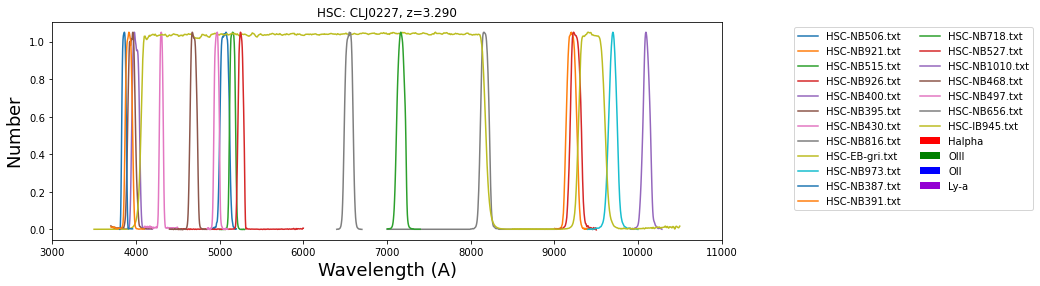

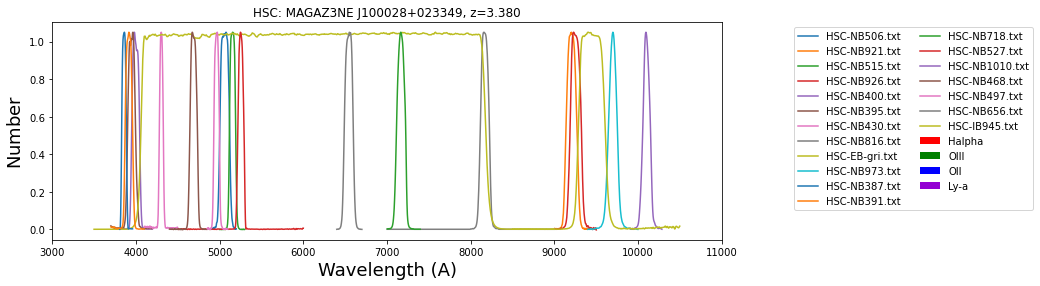

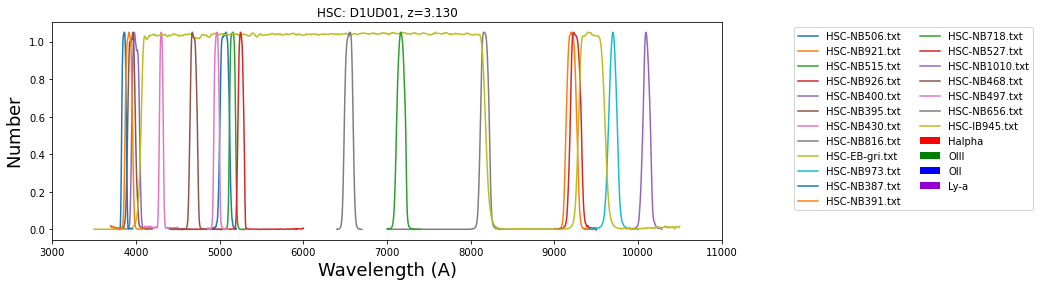

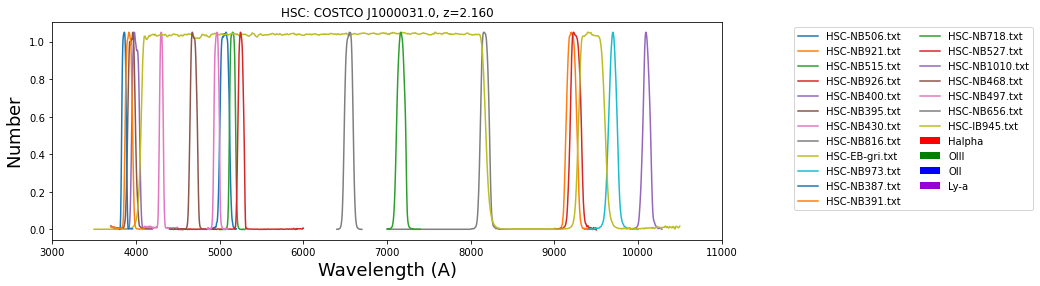

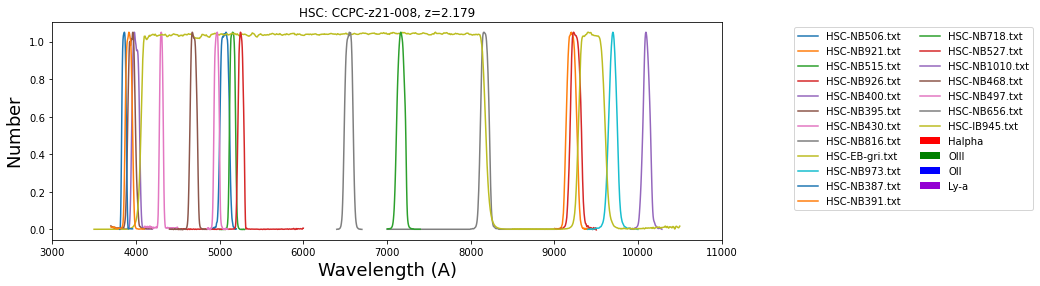

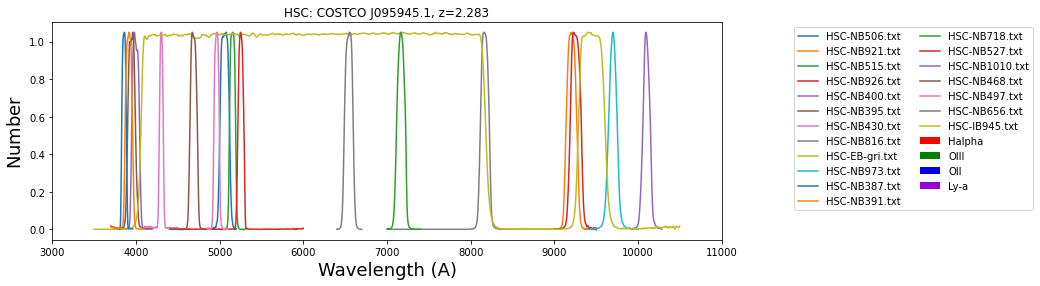

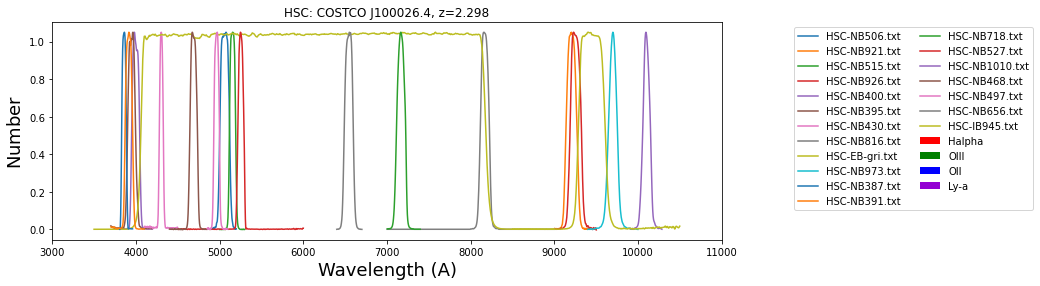

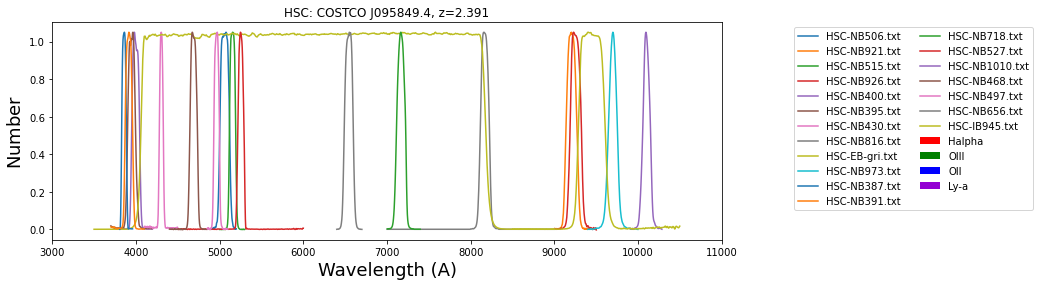

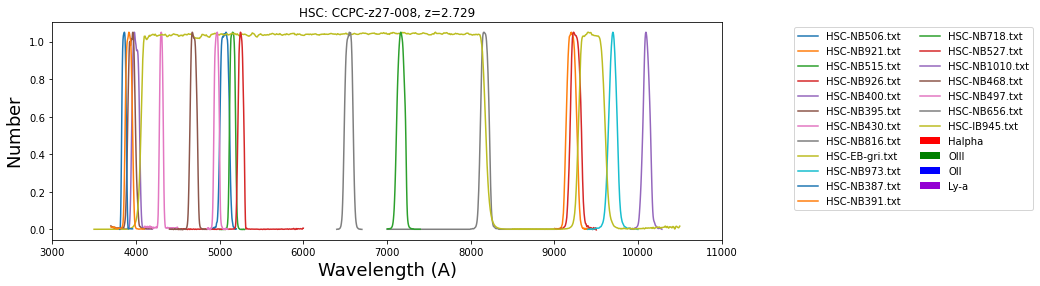

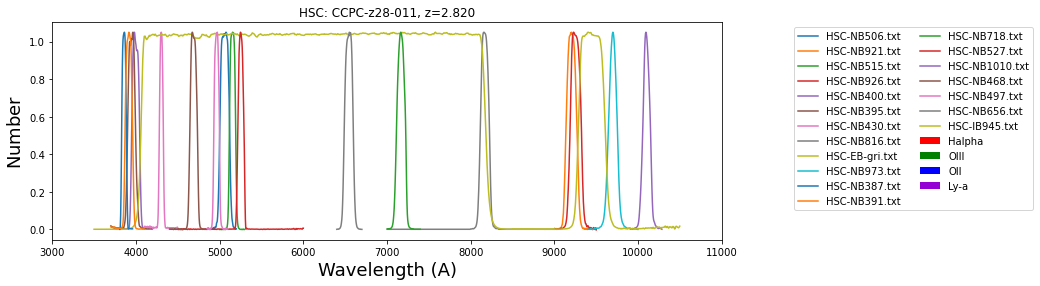

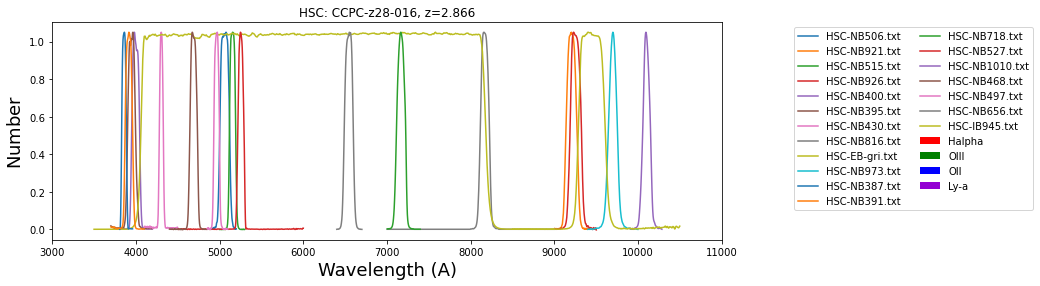

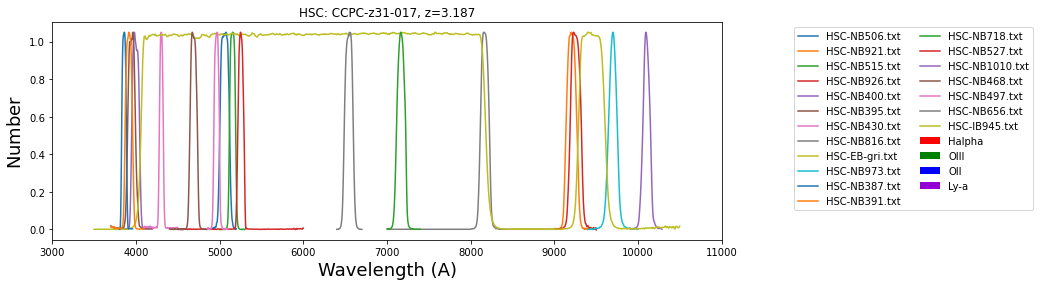

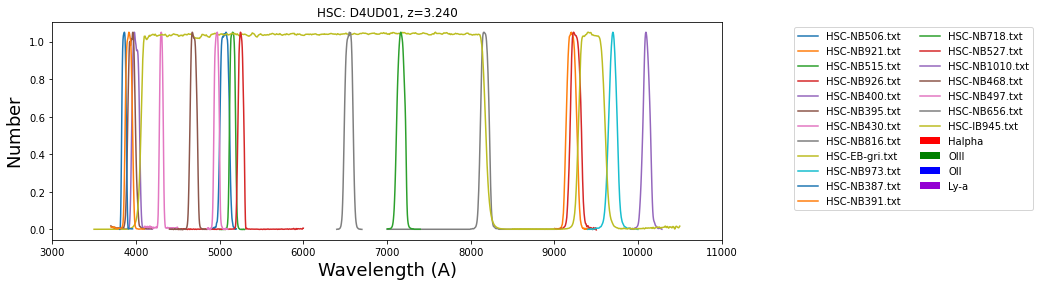

In [214]:
for i,c in enumerate(pcdat):
    ha = pcdat['H-alpha (microns)'][i]
    o3 = pcdat['OIII'][i]
    o2 = pcdat['OII'][i]
    lya = pcdat['Ly-a (Ang)'][i]
    mytitle = pcdat['name'][i]
    redshift = pcdat['z'][i]
    try:
        if len(mytitle) > 2:
            plot_filters(ha,o3,o2,title=mytitle,hsc=True,redshift=redshift,lya=lya)
            #plot_filters(ha,o3,o2,title=mytitle,moircs=True,redshift=redshift)
    except TypeError:
        continue
    

plotting Ly alpha  5155.84


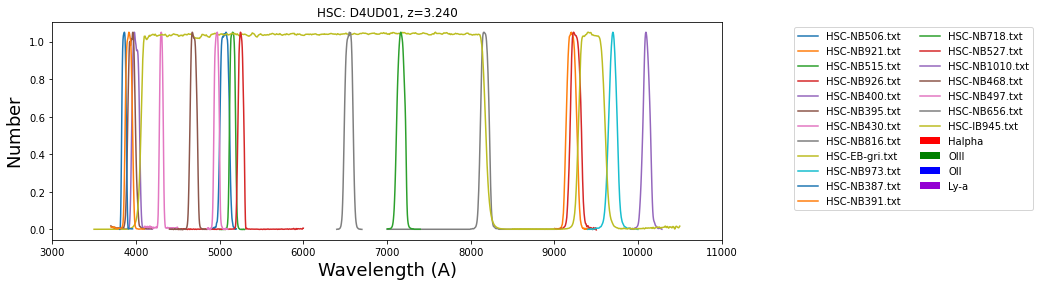

In [226]:
plot_filters(ha,o3,o2,title=mytitle,hsc=True,redshift=redshift,lya=lya)


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([5155.34, 5155.44, 5155.54, 5155.64, 5155.74, 5155.84, 5155.94,
        5156.04, 5156.14, 5156.24, 5156.34]),
 <BarContainer object of 10 artists>)

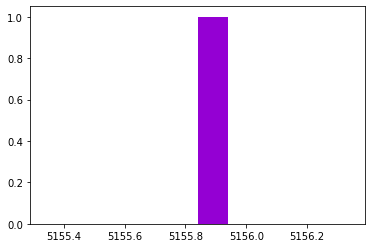

In [224]:
plt.hist(lya,color='darkviolet',label='Ly-a')